### PRiAD - Projekt: Analiza Eksploracyjna Danych  
**Stanisław Dutkiewicz, Piotr Szepietowski**  
**Zbiór danych**: [Car Prices Poland](https://www.kaggle.com/datasets/aleksandrglotov/car-prices-poland/data)  
**Cel projektu**: Analiza eksploracyjna wybranego zbioru danych 

---

### 1. Wstępna analiza zbioru danych

W ramach projektu przeprowadzamy wstępną analizę zbioru danych, która obejmuje:

- Wyznaczenie łącznej liczby obiektów (obserwacji) w zbiorze danych.
- Sprawdzenie liczby unikalnych klas (np. marek samochodów, jeśli dotyczy).
- Wyznaczenie liczby obiektów w każdej klasie.
- Określenie liczby atrybutów (cech) w zbiorze danych.
- Zliczenie brakujących danych w każdej kolumnie.

W dalszej analizie usunięte zostaną obiekty, które zawierają brakujące dane, aby zapewnić spójność analiz. Poniżej znajduje się kod wykonujący powyższe zadania:


In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Wczytanie zbioru danych
df = pd.read_csv('Car_Prices_Poland_Kaggle.csv')

# Usunięcie kolumny 'Unnamed: 0', która jest zbędna
df.drop(columns=['Unnamed: 0'], inplace=True)

# Wyświetlenie pierwszych 5 wierszy danych
df.head()

# Liczba obiektów (obserwacji)
print(f"Liczba obiektów: {df.shape[0]}")

# Liczba klas (np. marek samochodów)
print(f"Liczba klas (marek): {df['mark'].nunique()}")

# Liczba obiektów w każdej klasie
print("\nLiczba obiektów w każdej klasie:")
print(df['mark'].value_counts())

# Liczba atrybutów (cech)
print(f"\nLiczba atrybutów: {df.shape[1]}")

# Liczba brakujących danych
print(f"\nLiczba brakujących danych: {df.isna().sum().sum()}")

# Usunięcie danych brakujących
df.dropna(inplace=True)

# Potwierdzenie liczby obiektów po usunięciu braków danych
print(f"\nLiczba obiektów po usunięciu brakujących danych: {df.shape[0]}")


Liczba obiektów: 117927
Liczba klas (marek): 23

Liczba obiektów w każdej klasie:
mark
audi             12031
opel             11914
bmw              11070
volkswagen       10848
ford              9664
mercedes-benz     7136
renault           6976
skoda             5888
toyota            5120
peugeot           5056
volvo             4384
hyundai           4032
kia               3744
nissan            3072
fiat              2880
mazda             2848
seat              2848
citroen           2720
honda             2176
mitsubishi        1120
mini              1088
alfa-romeo         704
chevrolet          608
Name: count, dtype: int64

Liczba atrybutów: 10

Liczba brakujących danych: 30085

Liczba obiektów po usunięciu brakujących danych: 87842


---
### 2. Analiza zmienności atrybutów

W tej części projektu analizujemy zmienność poszczególnych atrybutów:

- Globalnie, w całym zbiorze danych.
- W podziale na klasy (marki samochodów).

Wyniki przedstawiono na odpowiednich wykresach. Poniżej znajduje się kod wykorzystany do analizy.


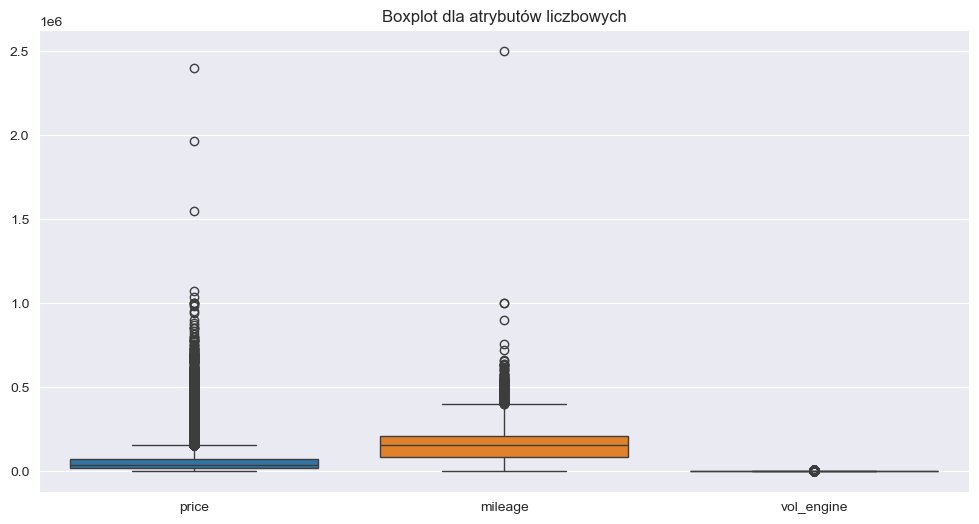

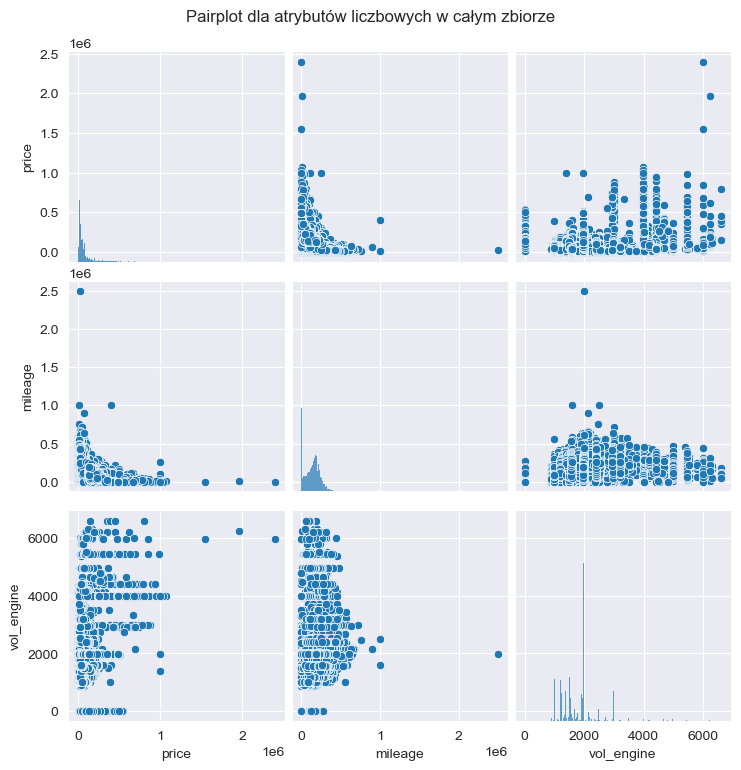

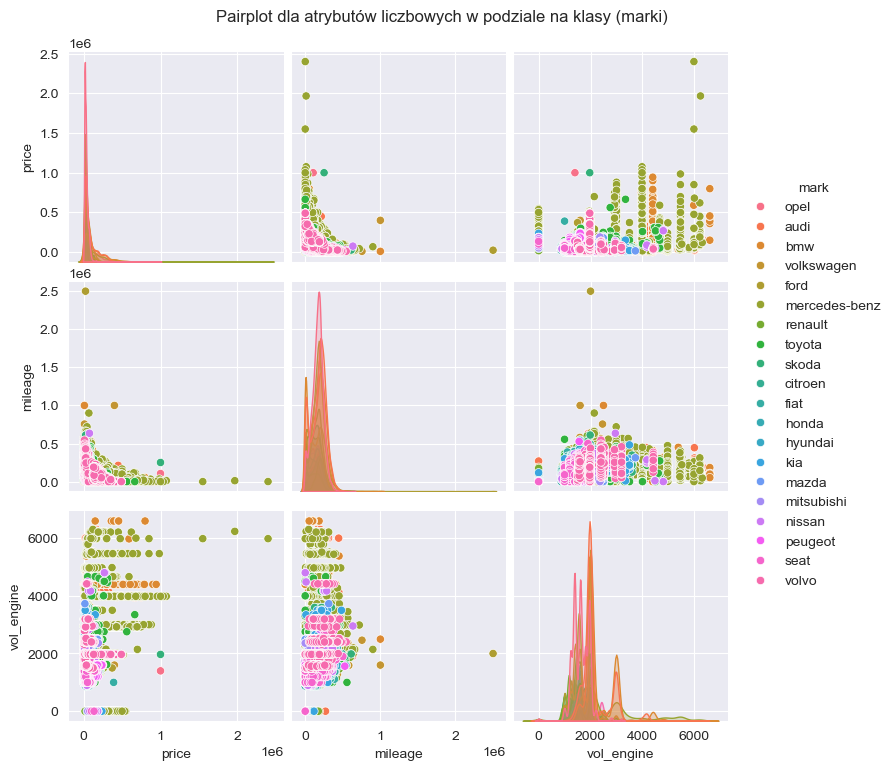

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot dla wszystkich danych liczbowych
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['price', 'mileage', 'vol_engine']])
plt.title("Boxplot dla atrybutów liczbowych")
plt.show()

# Pairplot dla atrybutów liczbowych
sns.pairplot(df[['price', 'mileage', 'vol_engine']])
plt.suptitle("Pairplot dla atrybutów liczbowych w całym zbiorze", y=1.02)
plt.show()

# Pairplot w podziale na klasy (marki samochodów)
sns.pairplot(df[['price', 'mileage', 'vol_engine', 'mark']], hue='mark')
plt.suptitle("Pairplot dla atrybutów liczbowych w podziale na klasy (marki)", y=1.02)
plt.show()


### Wnioski do punktu 2

* **Zadanie 2 - wnioski**  
  - Największą zmienność w całym zbiorze wykazuje atrybut `price` (cena), co widać na boxplotach.  
  - Atrybut `mileage` (przebieg) ma najbardziej porozrzucane dane, co utrudnia jego interpretację.  
  - Pomiędzy atrybutami `price` i `mileage` widać umiarkowaną zależność – większy przebieg często wiąże się z niższą ceną.  
  - W przypadku pairplotów w podziale na marki (`mark`), marki premium (np. BMW, Mercedes) mają wyraźnie wyższe ceny w porównaniu do marek budżetowych.  
  - Większość marek wykazuje rozrzut danych, ale brak wyraźnego rozgraniczenia pomiędzy ich atrybutami liczbowymi.  



---
### 3. Analiza korelacji i zdolności rozróżnienia klas

W tej części projektu analizujemy:
1. Stopień korelacji pomiędzy poszczególnymi atrybutami liczbowymi.
2. W jakim stopniu poszczególne cechy (np. `price`, `mileage`, `vol_engine`) umożliwiają rozróżnienie klas (marek samochodów).


In [32]:

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)
plt.title("Macierz korelacji pomiędzy atrybutami liczbowymi")
plt.show()



ValueError: could not convert string to float: 'opel'

<Figure size 1000x1000 with 0 Axes>

0po### Wnioski do punktu 3

* **Zadanie 3 - wnioski**  
  - Najsilniej skorelowane dodatnio są atrybuty `price` (cena) i `year` (rok produkcji) z wartością korelacji **0.61**.
  - Najsilniejsza korelacja ujemna występuje między `year` (rok produkcji) a `mileage` (przebieg) z wartością korelacji **-0.72**.
  - Atrybuty `price`, `year`, i `vol_engine` (pojemność silnika) wykazują największy potencjał do rozróżniania klas (marek), co widać w ich rozkładach.
  - Atrybut `mileage` (przebieg) charakteryzuje się umiarkowaną korelacją z innymi cechami i może mieć mniejsze znaczenie w rozróżnianiu klas.

Macierz korelacji oraz boxploty potwierdzają, że kluczowymi cechami różnicującymi klasy są `price`, `year` oraz `vol_engine`, podczas gdy `mileage` ma bardziej rozproszony charakter.


---
### 4. Analiza nadmiarowości cech

W tej części projektu oceniamy, które atrybuty (zmienne) można uznać za nadmiarowe, wykorzystując wcześniej wygenerowaną macierz korelacji. Usunięcie nadmiarowych cech może uprościć dalsze analizy i zwiększyć efektywność modeli.

In [5]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)
plt.title("Macierz korelacji pomiędzy atrybutami liczbowymi")
plt.show()


ValueError: could not convert string to float: 'opel'

<Figure size 1000x1000 with 0 Axes>

### Wnioski do punktu 4

* **Zadanie 4 - wnioski**
  - Można za nadmiarowy uznać jeden z atrybutów `price` (cena) lub `year` (rok produkcji), ponieważ ich korelacja wynosi **0.60**, co oznacza, że rok produkcji częściowo tłumaczy zmienność ceny.
  - Atrybuty `price` i `vol_engine` (pojemność silnika) są umiarkowanie skorelowane (**0.30**), ale nie wskazuje to jednoznacznie na nadmiarowość.
  - Atrybut `mileage` (przebieg) jest odwrotnie skorelowany z `year` (**-0.72**) oraz `price` (**-0.54**). Mimo tego wnosi dodatkową wartość analityczną i nie należy go usuwać.
  - Ogólnie, żaden atrybut nie jest jednoznacznie nadmiarowy, ale warto rozważyć, czy `year` i `price` są równocześnie potrzebne w pełnej analizie.


---
### 5. Stworzenie modelu przewidującego cenę samochodu na podstawie jego atrybutów

W tej części projektu tworzymy i porównujemy modele nauczania maszynowego.

In [33]:
# Importy używanych później funkcjonalności

from sklearn.linear_model import LinearRegression  ,BayesianRidge,HuberRegressor,ARDRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score,r2_score

from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectPercentile
from sklearn.preprocessing import StandardScaler ,PolynomialFeatures,minmax_scale,MaxAbsScaler ,LabelEncoder
from sklearn.neural_network import MLPRegressor

from sklearn.svm import SVR
from xgboost import XGBRegressor

ModuleNotFoundError: No module named 'xgboost'

In [34]:
df.head()

,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,opel,combo,gen-d-2011,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,opel,combo,gen-d-2011,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,opel,combo,gen-d-2011,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,opel,combo,gen-d-2011,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,opel,combo,gen-d-2011,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900


In [66]:
dfCopy = df.copy() 
# kopia wykorzystana aby zobaczyć różnicę z wykorzystaniem tylko atrybutów liczbowych, a wykorzystaniem również kategorycznych,  
# z których wybraliśmy  marke, model i rodzaj paliwa

LE=LabelEncoder()
LE.fit(dfCopy["mark"])
dfCopy["Mark"]=LE.transform(dfCopy["mark"])

LE2=LabelEncoder()
LE2.fit(dfCopy["fuel"])
dfCopy["Fuel"]=LE2.transform(dfCopy["fuel"])

LE3=LabelEncoder()
LE3.fit(dfCopy["model"])
dfCopy["Model"]=LE3.transform(dfCopy["model"])

df.drop(columns=["mark","model","fuel","city","province", "generation_name"],axis=1 ,inplace=True ) # odrzucenie nieliczbowych kolumn dla obydwu ram
dfCopy.drop(columns=["mark","model","fuel","city","province", "generation_name"],axis=1 ,inplace=True )

df.head()

,year,mileage,vol_engine,price
0,2015,139568,1248,35900
1,2018,31991,1499,78501
2,2015,278437,1598,27000
3,2016,47600,1248,30800
4,2014,103000,1400,35900


In [67]:
dfCopy.head()

,year,mileage,vol_engine,price,Mark,Fuel,Model
0,2015,139568,1248,35900,12,1,39
1,2018,31991,1499,78501,12,1,39
2,2015,278437,1598,27000,12,1,39
3,2016,47600,1248,30800,12,1,39
4,2014,103000,1400,35900,12,0,39


In [68]:
# Definiujemy X i Y

X1 = df.drop(columns="price")
y1 = df["price"]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.25, random_state=42)

X2 = dfCopy.drop(columns="price")
y2 = dfCopy["price"]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25, random_state=42)

frames = [[X_train1,X_test1,y_train1,y_test1], [X_train2,X_test2,y_train2,y_test2]]

In [69]:
for index, frame in enumerate(frames):
    if index == 0:
        print("Wynik dla tylko liczbowych atrybutów")
    else:
        print()
        print("Wynik dla również kategorycznych atrybutów")
    X_train, X_test, y_train, y_test = frame[0], frame[1], frame[2], frame[3]
    LinearRegression_model = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None)

    # Dopasowanie modelu
    LinearRegression_model.fit(X_train, y_train)

    # Wyniki dla danych treningowych i testowych
    print("Wynik modelu na danych treningowych: ", LinearRegression_model.score(X_train, y_train))
    print("Wynik modelu na danych testowych: ", LinearRegression_model.score(X_test, y_test))

    # Przewidywanie wartości Y na podstawie X_test
    y_pred_LR = LinearRegression_model.predict(X_test)

    # Ewaluacja modelu
    print("Ewaluacja modelu regresji liniowej: średni błąd absolutny wynosi ", mean_absolute_error(y_test, y_pred_LR))
    print("Ewaluacja modelu regresji liniowej: średni błąd kwadratowy wynosi ", mean_squared_error(y_test, y_pred_LR))
    print("Ewaluacja modelu regresji liniowej: medianowy błąd absolutny wynosi ", median_absolute_error(y_test, y_pred_LR))

    print("Ostateczny wynik dla modelu regresji liniowej: ", r2_score(y_test, y_pred_LR))

Wynik dla tylko liczbowych atrybutów
Wynik modelu na danych treningowych:  0.582154387016204
Wynik modelu na danych testowych:  0.5811094125467247
Ewaluacja modelu regresji liniowej: średni błąd absolutny wynosi  29581.00229617352
Ewaluacja modelu regresji liniowej: średni błąd kwadratowy wynosi  2516476149.717725
Ewaluacja modelu regresji liniowej: medianowy błąd absolutny wynosi  19985.19780342281
Ostateczny wynik dla modelu regresji liniowej:  0.5811094125467247

Wynik dla również kategorycznych atrybutów
Wynik modelu na danych treningowych:  0.5906175487875733
Wynik modelu na danych testowych:  0.5897469369798901
Ewaluacja modelu regresji liniowej: średni błąd absolutny wynosi  29502.3872490321
Ewaluacja modelu regresji liniowej: średni błąd kwadratowy wynosi  2464586408.387384
Ewaluacja modelu regresji liniowej: medianowy błąd absolutny wynosi  20327.880131937563
Ostateczny wynik dla modelu regresji liniowej:  0.5897469369798901


Przy wykorzystaniu algorytmu regresjii liniowej dodanie trzech dodatkowych liczbowych argumentów nie wpłynęło znacząco na zmianę dokładności.

In [70]:
for index, frame in enumerate(frames):
    if index == 0:
        print("Wynik dla tylko liczbowych atrybutów")
    else:
        print()
        print("Wynik dla również kategorycznych atrybutów")

    X_train, X_test, y_train, y_test = frame[0], frame[1], frame[2], frame[3]
    RandomForestRegressor_model = RandomForestRegressor()

    RandomForestRegressor_model.fit(X_train, y_train)

    print("Wynik modelu na danych treningowych: ", RandomForestRegressor_model.score(X_train, y_train))
    print("Wynik modelu na danych testowych: ", RandomForestRegressor_model.score(X_test, y_test))

    y_predRFR = RandomForestRegressor_model.predict(X_test)

    print("Ostateczny wynik dla modelu Random Forest Regressor: ", r2_score(y_test, y_predRFR))

Wynik dla tylko liczbowych atrybutów
Wynik modelu na danych treningowych:  0.9556653824989485
Wynik modelu na danych testowych:  0.8702255849997484
Ostateczny wynik dla modelu Random Forest Regressor:  0.8702255849997484

Wynik dla również kategorycznych atrybutów
Wynik modelu na danych treningowych:  0.9845497657160315
Wynik modelu na danych testowych:  0.9330275069867471
Ostateczny wynik dla modelu Random Forest Regressor:  0.9330275069867471
